## Imports and initializations

In [2]:
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPool2D
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
%matplotlib inline

In [4]:
random_seed = 2
np.random.seed(random_seed)

## Load and prepare data

In [5]:
train_df = pd.read_csv('data/train.csv', sep=',', encoding='utf-8')
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Check for null values (corrupt entries):

In [6]:
train_df.isnull().any().any()

False

All good, no null values.

### Training/validation split

In [7]:
train_df, valid_df = train_test_split(train_df, test_size=0.1, random_state=random_seed)
len(train_df), len(valid_df)

(37800, 4200)

### Data encoding

In [45]:
def encode_X(df):
    try:
        df_without_label = df.drop(labels=['label'], axis=1)
    except ValueError:
        df_without_label = df

    X = df_without_label.values
    
    # normalize the values between 0.0 and 1.0
    X = X / 255.0
    
    # reshape the image in 3D for keras input (28x28, 1 canal)
    X = X.reshape(-1, 28, 28, 1)
    
    return X

In [9]:
def encode_y(df):
    y = df['label'].values
    return to_categorical(y, num_classes=10)

In [10]:
def encode_X_and_y(df):
    X = encode_X(df)
    y = encode_y(df)
    return X, y

In [11]:
X_train, y_train = encode_X_and_y(train_df)
X_train.shape, y_train.shape

((37800, 28, 28, 1), (37800, 10))

In [12]:
X_valid, y_valid = encode_X_and_y(valid_df)
X_valid.shape, y_valid.shape

((4200, 28, 28, 1), (4200, 10))

## CNN

### Define the model

In [26]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same',
                 activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

### Compile the model

In [27]:
optimizer = RMSprop(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

### Train the model

In [28]:
epochs = 3
batch_size = 16

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_valid, y_valid),
                    verbose=1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/3
37800/37800 [==============================] - 718s - loss: 0.1832 - acc: 0.9451 - val_loss: 0.0635 - val_acc: 0.9821
Epoch 2/3
37800/37800 [==============================] - 692s - loss: 0.0862 - acc: 0.9765 - val_loss: 0.0512 - val_acc: 0.9836
Epoch 3/3
37800/37800 [==============================] - 784s - loss: 0.0839 - acc: 0.9783 - val_loss: 0.0598 - val_acc: 0.9862


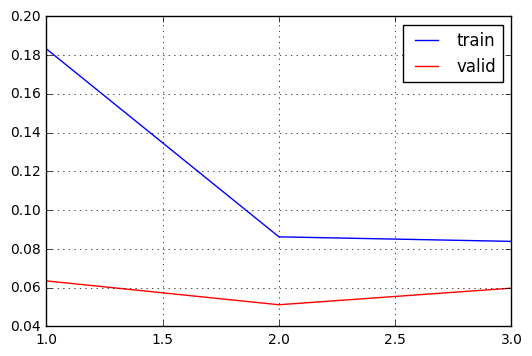

In [39]:
# display loss curve
plt.plot(range(1, len(history.history['loss']) + 1),
         history.history['loss'], color='b', label='train')
plt.plot(range(1, len(history.history['val_loss']) + 1),
         history.history['val_loss'], color='r', label='valid')
plt.legend()
plt.grid()
plt.show()

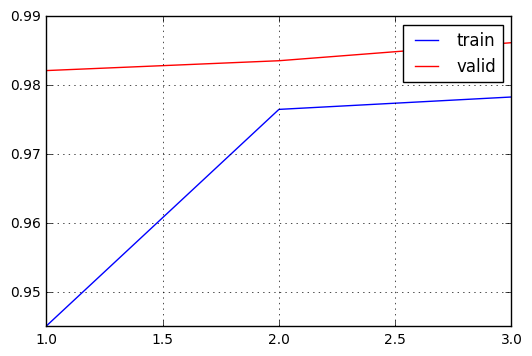

In [40]:
# display accuracy curve
plt.plot(range(1, len(history.history['acc']) + 1),
         history.history['acc'], color='b', label='train')
plt.plot(range(1, len(history.history['val_acc']) + 1),
         history.history['val_acc'], color='r', label='valid')
plt.legend()
plt.grid()
plt.show()

## Submission

In [41]:
test_df = pd.read_csv('data/test.csv', sep=',', encoding='utf-8')
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
len(test_df)

28000

In [46]:
X_test = encode_X(test_df)
X_test.shape

(28000, 28, 28, 1)

In [54]:
y_pred = model.predict(X_test)
y_pred.shape

(28000, 10)

In [57]:
y_pred = y_pred.argmax(axis=1)
y_pred.shape

(28000,)

In [58]:
submission_df = {
    'ImageId': range(1, y_pred.shape[0] + 1),
    'Label': y_pred
}

submission_df = pd.DataFrame(submission_df)[['ImageId', 'Label']]
submission_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [59]:
submission_df.to_csv('submission.csv', sep=',', encoding='utf-8', index=False)